# Apprentissage supervisé avec Python - Credit Scoring

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
import time

## I. Apprentisage supervisé : Feature engineering et Classification

### 1. Chargement des données et préparation

- chargement des données 

In [3]:
data = pd.read_csv('./credit_scoring.csv', sep=';')

In [4]:
data.head(5)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


- Transformation du jeu de données de type Data Frame en numpy Array

In [5]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

- Analyse des propriétes des données

In [6]:
data.shape

(4375, 14)

In [7]:
pourcentage_negative=100*np.sum(Y==0)/len(Y)
pourcentage_positive=100*np.sum(Y==1)/len(Y)
print('Pourcentage positif {0:.2f}%, Pourcentage négatif {1:.2f}%'.format(pourcentage_positive,pourcentage_negative))

Pourcentage positif 72.21%, Pourcentage négatif 27.79%


- Séparation du jeu de données

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.5,random_state=1)

### 2. Apprentissage et évaluation de modèles

- Modèle 1 : Arbre CART

In [10]:
def arbreCART_classifiers(X_train, X_test, y_train, y_test):
    # Initialisation de l'arbre CART
    cart_model = DecisionTreeClassifier(criterion='gini', random_state=1)
    cart_model.fit(X_train, y_train)  # Entraînement du modèle
    y_pred_cart = cart_model.predict(X_test)  # Prédiction sur l'ensemble de test

    # Calcul des métriques
    conf_matrix = confusion_matrix(y_test, y_pred_cart)
    precision = precision_score(y_test, y_pred_cart)
    accuracy = accuracy_score(y_test, y_pred_cart)

    # Affichage des résultats
    print("Matrice de confusion pour l'arbre CART :\n", conf_matrix)
    print(f"Pour l'arbre CART : Accuracy = {accuracy * 100:.2f}%, Précision = {precision * 100:.2f}%")


- Modèle 2 : k-plus-proches-voisins avec k=5

In [11]:
def KNN_classifiers(X_train, X_test, y_train, y_test):
    # Initialisation du modèle KNN
    knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    knn_model.fit(X_train, y_train)  # Entraînement du modèle
    y_pred_knn = knn_model.predict(X_test)  # Prédiction sur l'ensemble de test

    # Calcul des métriques
    conf_matrix = confusion_matrix(y_test, y_pred_knn)
    precision = precision_score(y_test, y_pred_knn)
    accuracy = accuracy_score(y_test, y_pred_knn)

    # Affichage des résultats
    print("Matrice de confusion pour KNN :\n", conf_matrix)
    print(f"Pour KNN : Accuracy = {accuracy * 100:.2f}%, Précision = {precision * 100:.2f}%")


- Modèle 3 : MultilayerPerceptron à 2 couches de tailles respectives 40 et 20

In [12]:
def MLP_classifiers(X_train, X_test, y_train, y_test):
    # Initialisation du modèle MLP
    mlp_model = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1, max_iter=500)
    mlp_model.fit(X_train, y_train)  # Entraînement du modèle
    y_pred_mlp = mlp_model.predict(X_test)  # Prédiction sur l'ensemble de test

    # Calcul des métriques
    conf_matrix = confusion_matrix(y_test, y_pred_mlp)
    precision = precision_score(y_test, y_pred_mlp)
    accuracy = accuracy_score(y_test, y_pred_mlp)

    # Affichage des résultats
    print("Matrice de confusion pour MLP :\n", conf_matrix)
    print(f"Pour MLP : Accuracy = {accuracy * 100:.2f}%, Précision = {precision * 100:.2f}%")


- Exécution sur les données non normalisées

In [15]:
arbreCART_classifiers(Xtrain,Xtest,Ytrain,Ytest)

Matrice de confusion pour l'arbre CART :
 [[ 325  279]
 [ 318 1266]]
Pour l'arbre CART : Accuracy = 72.71%, Précision = 81.94%


In [16]:
KNN_classifiers(Xtrain,Xtest,Ytrain,Ytest)

Matrice de confusion pour KNN :
 [[ 189  415]
 [ 187 1397]]
Pour KNN : Accuracy = 72.49%, Précision = 77.10%


In [17]:
MLP_classifiers(Xtrain,Xtest,Ytrain,Ytest)

Matrice de confusion pour MLP :
 [[ 323  281]
 [ 353 1231]]
Pour MLP : Accuracy = 71.02%, Précision = 81.42%


### 3. Normalisations des variables continues

In [18]:
SS=StandardScaler()
SS.fit(Xtrain)
Xtrain_norm=SS.transform(Xtrain)
Xtest_norm=SS.transform(Xtest)

- Exécution sur les données normalisées

In [19]:
arbreCART_classifiers(Xtrain_norm,Xtest_norm,Ytrain,Ytest)

Matrice de confusion pour l'arbre CART :
 [[ 322  282]
 [ 315 1269]]
Pour l'arbre CART : Accuracy = 72.71%, Précision = 81.82%


In [20]:
KNN_classifiers(Xtrain_norm,Xtest_norm,Ytrain,Ytest)

Matrice de confusion pour KNN :
 [[ 286  318]
 [ 223 1361]]
Pour KNN : Accuracy = 75.27%, Précision = 81.06%


In [21]:
MLP_classifiers(Xtrain_norm,Xtest_norm,Ytrain,Ytest)

Matrice de confusion pour MLP :
 [[ 330  274]
 [ 254 1330]]
Pour MLP : Accuracy = 75.87%, Précision = 82.92%


- Interpretation 

In [22]:
# Données des performances
dataII = {
    "Modèle": ["CART", "KNN", "MLP"],
    "Accuracy (Non normalisé)": [72.71, 72.49, 71.02],
    "Précision (Non normalisé)": [81.94, 77.10, 81.42],
    "Accuracy (Normalisé)": [72.71, 75.27, 75.87],
    "Précision (Normalisé)": [81.82, 81.06, 82.92],
}

# Création du DataFrame
df = pd.DataFrame(dataII)

# Si vous souhaitez afficher sous forme d'un tableau clair
from tabulate import tabulate
print(tabulate(df, headers="keys", tablefmt="pretty"))


+---+--------+--------------------------+---------------------------+----------------------+-----------------------+
|   | Modèle | Accuracy (Non normalisé) | Précision (Non normalisé) | Accuracy (Normalisé) | Précision (Normalisé) |
+---+--------+--------------------------+---------------------------+----------------------+-----------------------+
| 0 |  CART  |          72.71           |           81.94           |        72.71         |         81.82         |
| 1 |  KNN   |          72.49           |           77.1            |        75.27         |         81.06         |
| 2 |  MLP   |          71.02           |           81.42           |        75.87         |         82.92         |
+---+--------+--------------------------+---------------------------+----------------------+-----------------------+


- CART : Performances constantes, pas d'effet notable de la normalisation.
- KNN :  Grosse amélioration grâce à la normalisation.
- MLP :  Très impacté par la normalisation, avec des gains significatifs en accuracy et en précision.

### 4. Création de nouvelles variables caractérisques par combinaisons linéaires des variables initiales (ACP)

In [23]:
pca=PCA(n_components=3)

pca.fit(Xtrain_norm)
Xtrain_pca=pca.transform(Xtrain_norm)
Xtest_pca=pca.transform(Xtest_norm)

Xtrain_pca=np.concatenate((Xtrain_norm,Xtrain_pca),axis=1)
Xtest_pca=np.concatenate((Xtest_norm,Xtest_pca),axis=1)

In [24]:
arbreCART_classifiers(Xtrain_pca,Xtest_pca,Ytrain,Ytest)

Matrice de confusion pour l'arbre CART :
 [[ 351  253]
 [ 324 1260]]
Pour l'arbre CART : Accuracy = 73.63%, Précision = 83.28%


In [25]:
KNN_classifiers(Xtrain_pca,Xtest_pca,Ytrain,Ytest)

Matrice de confusion pour KNN :
 [[ 283  321]
 [ 212 1372]]
Pour KNN : Accuracy = 75.64%, Précision = 81.04%


In [26]:
MLP_classifiers(Xtrain_pca,Xtest_pca,Ytrain,Ytest)

Matrice de confusion pour MLP :
 [[ 321  283]
 [ 268 1316]]
Pour MLP : Accuracy = 74.82%, Précision = 82.30%


- Interprétation

In [27]:
# Comparaison globale des performances après ACP
data_comparison = {
    "Modèle": ["CART", "KNN", "MLP"],
    "Accuracy (Normalisé)": [72.71, 75.27, 75.87],
    "Précision (Normalisé)": [81.82, 81.06, 82.92],
    "Accuracy (ACP)": [73.63, 75.64, 74.82],
    "Précision (ACP)": [83.28, 81.04, 82.30],
}

# Création du tableau
df_comparison = pd.DataFrame(data_comparison)

# Affichage du tableau
from tabulate import tabulate
print("\n--- Comparaison ---")
print(tabulate(df_comparison, headers="keys", tablefmt="pretty"))



--- Comparaison ---
+---+--------+----------------------+-----------------------+----------------+-----------------+
|   | Modèle | Accuracy (Normalisé) | Précision (Normalisé) | Accuracy (ACP) | Précision (ACP) |
+---+--------+----------------------+-----------------------+----------------+-----------------+
| 0 |  CART  |        72.71         |         81.82         |     73.63      |      83.28      |
| 1 |  KNN   |        75.27         |         81.06         |     75.64      |      81.04      |
| 2 |  MLP   |        75.87         |         82.92         |     74.82      |      82.3       |
+---+--------+----------------------+-----------------------+----------------+-----------------+


- Arbre CART : Les performances s'améliorent légèrement grâce à l'ACP. L'ACP semble utile pour CART, qui peut exploiter les nouvelles dimensions générées.
- KNN : L'ACP n'a pas d'impact significatif sur KNN. Ce modèle pourrait se passer de cette étape, sauf si le gain computationnel (moins de dimensions) est recherché.
- MLP : L'ACP a un effet positif, car elle aide le réseau à mieux capturer les relations dans les données. Cependant, les gains sont légers.

$\textbf{Meilleur algorithme}$ : Le MLP est le plus performant avec une accuracy de $74.82%$ et une précision de $82.30%$ après normalisation et ACP.

$\textbf{Normalisation}$ : Oui, elle est essentielle pour améliorer les performances de KNN et MLP.

$\textbf{ACP}$ : Non indispensable, mais elle peut légèrement améliorer les performances (notamment pour CART et MLP) et réduire les dimensions des données.



### 5. Selection de variables (Random Forest)

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


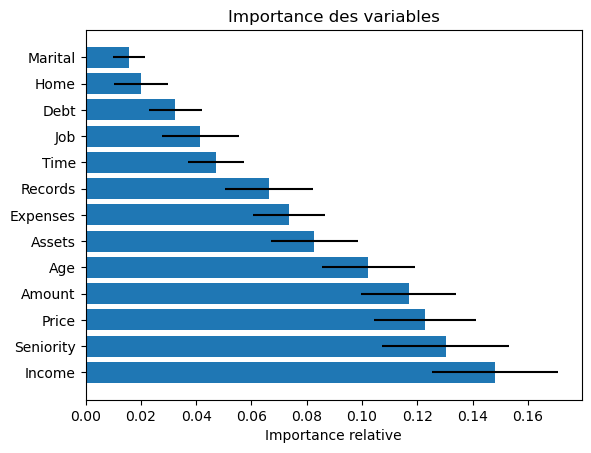

In [30]:
# Entraînement du modèle RandomForest
rf_model = RandomForestClassifier(n_estimators=1000, random_state=1)
rf_model.fit(Xtrain_norm, Ytrain) 

importances = rf_model.feature_importances_
std_dev = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

sorted_indices = np.argsort(importances)[::-1]

# Extraction des noms des features
feature_names = data.columns[:-1]  

print(features[sorted_idx])

# Affichage de l'histogramme des importances
positions = np.arange(Xtrain_norm.shape[1]) + 0.5
plt.barh(positions, importances[sorted_indices], xerr=std_dev[sorted_indices], align='center')
plt.yticks(positions, feature_names[sorted_indices])
plt.xlabel("Importance relative")
plt.title("Importance des variables")
plt.show()

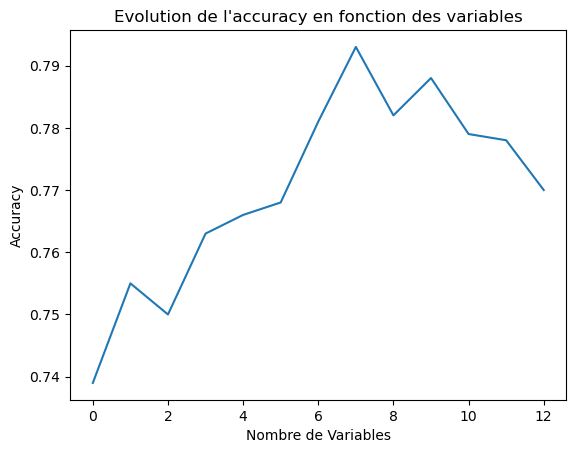

In [33]:
MLP=MLPClassifier(hidden_layer_sizes=(40,20),random_state=1) 
scores=np.zeros(Xtrain_norm.shape[1])
for f in np.arange(0, Xtrain_norm.shape[1]):
    X1_f = Xtrain_norm[:,sorted_idx[:f+1]]
    X2_f = Xtest_norm[:,sorted_idx[:f+1]] 
    MLP.fit(X1_f,Ytrain)
    YMLP=MLP.predict(X2_f) 
    scores[f]=np.round(accuracy_score(Ytest,YMLP),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables") 
plt.show()

On peut voir que les variables avec le plus d'importance sont les variables $\textbf{Income}$, $\textbf{Seniority}$, $\textbf{Price}$, $\textbf{Amount}$, $\textbf{Age}$, $\textbf{Assets}$, $\textbf{Expenses}$, $\textbf{Records}$.

Au vue de la courbe, nous allons garder ces $8$ variables

- Paramétrage des classifieurs

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, make_scorer

In [36]:
# Sélectio les 8 meilleures variables
X_train_selected = Xtrain_norm[:, sorted_idx[:8]]
X_test_selected = Xtest_norm[:, sorted_idx[:8]]

# Définition des hyperparamètres à tester
parameters = {
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'hidden_layer_sizes': [(40, 20), (40, 10), (10,), (30,)]
}

MLP = MLPClassifier(random_state=1)

Grille = GridSearchCV(MLP, parameters, cv=10, scoring='accuracy', n_jobs=-1)
Grille.fit(X_train_selected, Ytrain)

Y_grille = Grille.predict(X_test_selected)
accuracy = accuracy_score(Ytest, Y_grille)

print(f"Meilleurs paramètres (accuracy) : {Grille.best_params_}")
print(f"Accuracy obtenue : {accuracy:.4f}")

def moyenne(Ytrue, Ypred):
    return (accuracy_score(Ytrue, Ypred) + precision_score(Ytrue, Ypred)) / 2

monscore = make_scorer(moyenne, greater_is_better=True)

Grille_moyenne = GridSearchCV(MLP, parameters, cv=10, scoring=monscore, n_jobs=-1)
Grille_moyenne.fit(X_train_selected, Ytrain)

print(f"Meilleurs paramètres (score personnalisé) : {Grille_moyenne.best_params_}")

precision_classe_0 = precision_score(Ytest, Y_grille, pos_label=0)
print(f"Précision sur la classe 0 : {precision_classe_0:.4f}")


Meilleurs paramètres (accuracy) : {'activation': 'tanh', 'hidden_layer_sizes': (10,)}
Accuracy obtenue : 0.7966
Meilleurs paramètres (score personnalisé) : {'activation': 'tanh', 'hidden_layer_sizes': (30,)}
Précision sur la classe 0 : 0.6906


- Interprétation des résultats :
    Avec l'accuracy comme critère, le modèle optimal utilise 10 neurones et atteint 79.66% de précision globale. Cela signifie qu'il fait de bonnes prédictions dans l’ensemble.

    Avec un score personnalisé (moyenne entre accuracy et précision), le modèle préféré a 30 neurones, car il équilibre mieux la performance sur les deux classes.

    Précision sur la classe 0 (mauvais payeurs) : 69.06% → Cela signifie que 69% des personnes prédites comme "mauvais payeurs" le sont réellement.

- Conclusion :

    Si on veut un modèle plus simple et performant en général, on choisit 10 neurones.
    
    Si on veut mieux identifier les mauvais payeurs (classe 0), on privilégie 30 neurones, même si l’accuracy globale n’est pas optimisée.
    
Dans un contexte bancaire, minimiser les erreurs sur les mauvais payeurs est crucial, donc le modèle avec 30 neurones est le plus adapté.

### 6. Création d'un pipeline

In [37]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.feature_selection import SelectFromModel
import pickle

In [58]:
# Création du pipeline
Pip = Pipeline([
    ('SS', StandardScaler()), 
    ('SV', SelectFromModel(RandomForestClassifier(n_estimators=1000, random_state=1), max_features=8)),
    ('classifieur', MLPClassifier(activation='tanh', hidden_layer_sizes=(30,), random_state=1))
])

Pip.fit(X, Y)
pickle.dump(Pip, open('./pipeline_banque.pkl', 'wb'))

- Test du Pipeline

In [ ]:
df = pd.read_csv("credit_scoring.csv", sep=";")

df_sample = df.sample(n=5, random_state=42) 

print(df_sample)

df_sample.to_csv("test_pip.csv", index=False)

print(df_sample)


In [59]:
data_test = pd.read_csv("test_pip.csv", sep=",")

data_test1 = data_test.drop(columns=['Status'])

print(data_test1.head())

   Seniority  Home  Time   Age  Marital  Records  Job  Expenses  Income  \
0        5.0   1.0  24.0  33.0      0.0      1.0  0.0      60.0   115.0   
1        2.0   1.0  60.0  46.0      1.0      1.0  0.0      49.0   136.0   
2        1.0   1.0  36.0  33.0      0.0      1.0  0.0      35.0   200.0   
3       19.0   1.0  60.0  37.0      0.0      2.0  0.0      88.0   125.0   
4       20.0   0.0  36.0  37.0      0.0      2.0  0.0      60.0   150.0   

   Assets  Debt  Amount   Price  
0     0.0   0.0   400.0  1600.0  
1     0.0   0.0  1500.0  1687.0  
2     0.0   0.0   600.0  1580.0  
3     0.0   0.0   750.0   970.0  
4  3500.0   0.0   450.0   950.0  


In [60]:
data_test1=data_test1.values

In [63]:
data_test1

array([[   5.,    1.,   24.,   33.,    0.,    1.,    0.,   60.,  115.,
           0.,    0.,  400., 1600.],
       [   2.,    1.,   60.,   46.,    1.,    1.,    0.,   49.,  136.,
           0.,    0., 1500., 1687.],
       [   1.,    1.,   36.,   33.,    0.,    1.,    0.,   35.,  200.,
           0.,    0.,  600., 1580.],
       [  19.,    1.,   60.,   37.,    0.,    2.,    0.,   88.,  125.,
           0.,    0.,  750.,  970.],
       [  20.,    0.,   36.,   37.,    0.,    2.,    0.,   60.,  150.,
        3500.,    0.,  450.,  950.]])

In [61]:
Pip=pickle.load(open('./pipeline_banque.pkl','rb'))
Pip.predict(data_test1)

array([1, 0, 1, 1, 1], dtype=int64)

In [62]:
Pip.predict_proba(data_test1)

array([[0.08252446, 0.91747554],
       [0.62124405, 0.37875595],
       [0.14155851, 0.85844149],
       [0.08331615, 0.91668385],
       [0.01763084, 0.98236916]])

### 7. Comparaison de plusieurs algorithmes d'apprentissage

In [78]:
!pip install xgboost

     -------------------------------------- 124.9/124.9 MB 2.3 MB/s eta 0:00:00


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import KFold,cross_val_score,cross_validate
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

- Dictionnaire des classifieurs

In [16]:
# Dictionnaire des classifieurs
clfs = {
    'NB': GaussianNB(),
    'RF': RandomForestClassifier(n_estimators=200, random_state=1),
    'BAG': BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), n_estimators=200, random_state=1),
    'ADA': AdaBoostClassifier(n_estimators=200, random_state=1),
    'ET': ExtraTreesClassifier(n_estimators=200, random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'CART': DecisionTreeClassifier(criterion='gini', random_state=1),
    'ID3': DecisionTreeClassifier(criterion='entropy', random_state=1),
    'Stumb': DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=1),
    'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1),
    'XGB': XGBClassifier(n_estimators=200, random_state=1)
}


def run_classifieurs(X,Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=1) 
    for i in clfs:
        clf = clfs[i]
        cv_results = cross_validate(clf, X, Y, cv=kf,scoring=['accuracy','precision'])
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} en {3:.3f}s".format(i,np.mean(cv_results['test_accuracy']),np.std(cv_results['test_accuracy']),np.mean(cv_results['fit_time'])))

In [17]:
# Fonction d’évaluation des classifieurs
def run_classifieurs(X, Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    for i in clfs:
        clf = clfs[i]
        start = time.time()
        cv_results = cross_validate(clf, X, Y, cv=kf, scoring=['accuracy', 'precision', 'roc_auc'])
        end = time.time()

        print("Algorithm: {0}".format(i))
        print(" - Accuracy: {0:.3f} +/- {1:.3f}".format(np.mean(cv_results['test_accuracy']), np.std(cv_results['test_accuracy'])))
        print(" - AUC: {0:.3f} +/- {1:.3f}".format(np.mean(cv_results['test_roc_auc']), np.std(cv_results['test_roc_auc'])))
        print(" - Training time: {0:.3f}s\n".format(end - start))


In [82]:
run_classifieurs(X,Y)

Algorithm: NB
 - Accuracy: 0.773 +/- 0.018
 - AUC: 0.792 +/- 0.020
 - Training time: 0.362s

Algorithm: RF
 - Accuracy: 0.787 +/- 0.016
 - AUC: 0.831 +/- 0.019
 - Training time: 18.651s

Algorithm: BAG
 - Accuracy: 0.779 +/- 0.019
 - AUC: 0.824 +/- 0.018
 - Training time: 47.026s

Algorithm: ADA
 - Accuracy: 0.787 +/- 0.014
 - AUC: 0.822 +/- 0.014
 - Training time: 13.133s

Algorithm: ET
 - Accuracy: 0.781 +/- 0.016
 - AUC: 0.813 +/- 0.019
 - Training time: 13.251s

Algorithm: KNN
 - Accuracy: 0.720 +/- 0.022
 - AUC: 0.664 +/- 0.023
 - Training time: 0.625s

Algorithm: CART
 - Accuracy: 0.721 +/- 0.016
 - AUC: 0.655 +/- 0.020
 - Training time: 0.305s

Algorithm: ID3
 - Accuracy: 0.714 +/- 0.015
 - AUC: 0.642 +/- 0.020
 - Training time: 0.349s

Algorithm: Stumb
 - Accuracy: 0.725 +/- 0.019
 - AUC: 0.622 +/- 0.015
 - Training time: 0.086s

Algorithm: MLP
 - Accuracy: 0.708 +/- 0.082
 - AUC: 0.733 +/- 0.020
 - Training time: 7.908s

Algorithm: XGB
 - Accuracy: 0.771 +/- 0.024
 - AUC: 0.81

- Interprétation des résultats de la comparaison des algorithmes

Nous avons testé plusieurs algorithmes de classification sur notre dataset en utilisant une validation croisée à $10$ folds. Les performances ont été évaluées selon trois critères :
    
    L'accuracy 
    L'AUC (Aire sous la courbe ROC) 
    Le temps d'entraînement
    
- $\textbf{Les meilleurs algorithmes en termes de performance }$:

    Random Forest (RF) est le modèle qui offre la meilleure performance globale avec $78.7\%$ d’accuracy et une AUC de $83.1\%$. Il semble bien adapté aux données, mais son temps d’entraînement est assez long $(18.65s)$.
    
    Bagging (BAG) et AdaBoost (ADA) ont des performances similaires à RF (accuracy ≈ $78\%$ et AUC ≈ $82\%$), mais Bagging est beaucoup plus lent $(47s)$, tandis qu’AdaBoost est un peu plus rapide $(13s)$.
    
    XGBoost (XGB) est aussi un bon choix avec une AUC de $81\%$ et un temps d’entraînement plus court $(2.12s)$.

- $\textbf{Un bon compromis entre rapidité et précision}$

    Naïve Bayes (NB) est très rapide $(0.36s)$ et offre des résultats acceptables (accuracy de $77.3\%$ et AUC de $79.2\%$).
    
    Extra Trees (ET) a des résultats proches de RF (AUC de $81.3\%$) avec un temps d’entraînement modéré $(13.25s)$.
    
- $\textbf{Les modèles les moins performants}$

    KNN, CART, ID3 et Stump ont une AUC inférieure à $67\%$, ce qui signifie qu’ils font beaucoup d’erreurs dans la distinction entre bons et mauvais payeurs.
    
    MLP est instable avec une grande variance (accuracy de $70.8\% ± 8.2\%$), ce qui indique qu'il ne généralise pas bien sur ce dataset.
    
Conclusion :

🔹 Si on cherche la meilleure performance, Random Forest est le meilleur choix, mais son entraînement est un peu long.

🔹 Si on veut un bon compromis entre rapidité et précision, XGBoost ou Naïve Bayes sont de bonnes alternatives.

🔹 Les modèles comme CART, ID3 et KNN ne sont pas adaptés à ce problème.

Nous allons normaliser les données et exécuter à nouveau les classifieurs

In [18]:
SS=StandardScaler()
SS.fit(X)
Xnorm=SS.transform(X)

run_classifieurs(Xnorm,Y)

Algorithm: NB
 - Accuracy: 0.762 +/- 0.015
 - AUC: 0.795 +/- 0.018
 - Training time: 0.535s

Algorithm: RF
 - Accuracy: 0.786 +/- 0.015
 - AUC: 0.831 +/- 0.019
 - Training time: 22.958s

Algorithm: BAG
 - Accuracy: 0.779 +/- 0.018
 - AUC: 0.825 +/- 0.018
 - Training time: 53.667s

Algorithm: ADA
 - Accuracy: 0.787 +/- 0.014
 - AUC: 0.822 +/- 0.014
 - Training time: 14.652s

Algorithm: ET
 - Accuracy: 0.781 +/- 0.016
 - AUC: 0.813 +/- 0.019
 - Training time: 16.660s

Algorithm: KNN
 - Accuracy: 0.759 +/- 0.020
 - AUC: 0.762 +/- 0.025
 - Training time: 1.459s

Algorithm: CART
 - Accuracy: 0.720 +/- 0.015
 - AUC: 0.654 +/- 0.019
 - Training time: 0.378s

Algorithm: ID3
 - Accuracy: 0.716 +/- 0.016
 - AUC: 0.643 +/- 0.019
 - Training time: 0.449s

Algorithm: Stumb
 - Accuracy: 0.725 +/- 0.019
 - AUC: 0.622 +/- 0.015
 - Training time: 0.084s

Algorithm: MLP
 - Accuracy: 0.788 +/- 0.014
 - AUC: 0.834 +/- 0.019
 - Training time: 31.936s

Algorithm: XGB
 - Accuracy: 0.771 +/- 0.024
 - AUC: 0.8

Si on utilise des modèles basés sur des distances (KNN, MLP), la normalisation est essentielle.

Pour les modèles d’arbres (RF, ET, XGB, ADA), la normalisation n’a pas d’impact significatif.

Globalement, MLP semble être le grand gagnant après normalisation, avec une AUC de $83.4\%$

- Analyse en Composantes Principales

In [19]:
pca=PCA(n_components=3)
pca.fit(Xnorm)
Xnorm_pca=pca.transform(Xnorm)
Xnorm_pca=np.concatenate((Xnorm,Xnorm_pca),axis=1)

In [86]:
run_classifieurs(Xnorm_pca,Y)

Algorithm: NB
 - Accuracy: 0.742 +/- 0.010
 - AUC: 0.785 +/- 0.019
 - Training time: 0.175s

Algorithm: RF
 - Accuracy: 0.784 +/- 0.021
 - AUC: 0.831 +/- 0.016
 - Training time: 27.625s

Algorithm: BAG
 - Accuracy: 0.782 +/- 0.020
 - AUC: 0.825 +/- 0.016
 - Training time: 82.314s

Algorithm: ADA
 - Accuracy: 0.787 +/- 0.018
 - AUC: 0.821 +/- 0.019
 - Training time: 17.317s

Algorithm: ET
 - Accuracy: 0.780 +/- 0.013
 - AUC: 0.812 +/- 0.018
 - Training time: 14.344s

Algorithm: KNN
 - Accuracy: 0.762 +/- 0.009
 - AUC: 0.759 +/- 0.020
 - Training time: 2.031s

Algorithm: CART
 - Accuracy: 0.723 +/- 0.022
 - AUC: 0.658 +/- 0.027
 - Training time: 0.864s

Algorithm: ID3
 - Accuracy: 0.731 +/- 0.015
 - AUC: 0.664 +/- 0.017
 - Training time: 0.637s

Algorithm: Stumb
 - Accuracy: 0.725 +/- 0.019
 - AUC: 0.622 +/- 0.015
 - Training time: 0.112s

Algorithm: MLP
 - Accuracy: 0.795 +/- 0.015
 - AUC: 0.833 +/- 0.019
 - Training time: 45.074s

Algorithm: XGB
 - Accuracy: 0.781 +/- 0.023
 - AUC: 0.8

- Interprétation

MLP devient le meilleur modèle : Accuracy $79.5\%$, AUC $83.3\%$.
    
Peu d’impact sur Random Forest, XGBoost, AdaBoost.

Naïve Bayes se détériore légèrement ($74.2\%$, $78.5\%$).

On peut donc conclure que la PCA améliore légèrement MLP mais ralentit les autres modèles.

['Income' 'Seniority' 'PCA2' 'PCA3' 'Price' 'PCA1' 'Amount' 'Age'
 'Records' 'Assets' 'Expenses' 'Job' 'Time' 'Debt' 'Home' 'Marital']


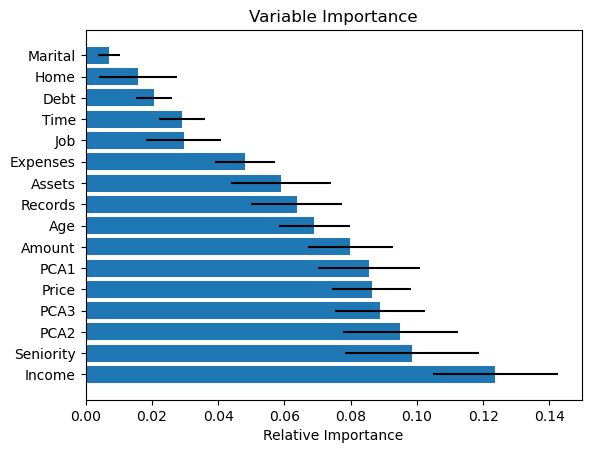

In [24]:
model_RF = RandomForestClassifier(n_estimators=200,random_state=1) 
model_RF.fit(Xnorm_pca, Y) 

importances=model_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_RF.estimators_],axis=0) 

sorted_index = np.argsort(importances)[::-1]
features =data.columns[:-1] 
features = np.concatenate((features,['PCA1','PCA2','PCA3']))
print(features[sorted_index])
padding = np.arange(Xnorm_pca.size/len(Xnorm_pca)) + 0.5 
plt.barh(padding, importances[sorted_index],xerr=std[sorted_index], align='center') 
plt.yticks(padding, features[sorted_index])
plt.xlabel("Relative Importance")
plt.title("Variable Importance") 
plt.show()

- Les $3$ variables les plus déterminantes sont :
Income, Seniority, PCA2 (composante principale 2 de l’ACP)


- Le revenu est la variable la plus influente, ce qui est logique car il détermine directement la capacité de remboursement.
L’ancienneté est aussi cruciale, car elle peut refléter la stabilité de l’emploi.
La PCA2 semble capturer une information pertinente sur les données d'origine.

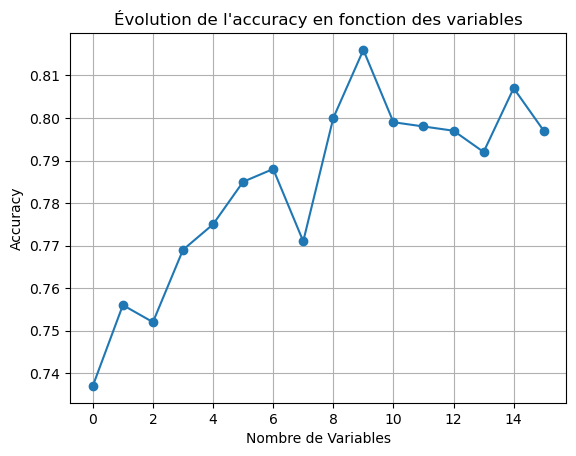

In [27]:
Xtrain_pca,Xtest_pca,Ytrain,Ytest=train_test_split(Xnorm_pca,Y,test_size=0.3,random_state=1)


scores = np.zeros(Xtrain_pca.shape[1])
for f in np.arange(0, Xtrain_pca.shape[1]):
    X1_f = Xtrain_pca[:, sorted_index[:f+1]]
    X2_f = Xtest_pca[:, sorted_index[:f+1]] 

    MLP = MLPClassifier(hidden_layer_sizes=(20,10), random_state=1)  
    MLP.fit(X1_f, Ytrain)
    YMLP = MLP.predict(X2_f) 
    scores[f] = np.round(accuracy_score(Ytest, YMLP), 3)


plt.plot(scores, marker='o', linestyle='-')
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Évolution de l'accuracy en fonction des variables")
plt.grid()
plt.show()

In [30]:
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
)

<Figure size 1000x700 with 0 Axes>

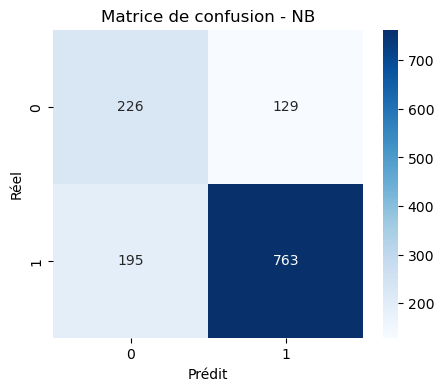

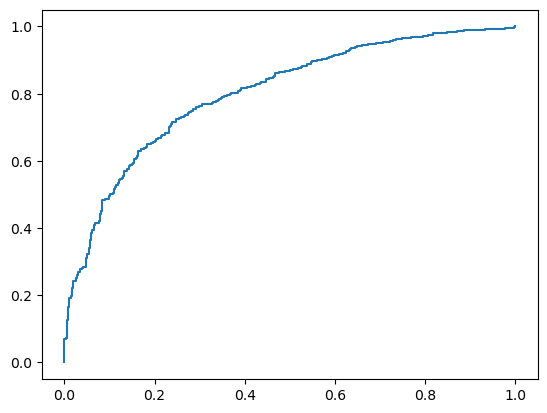

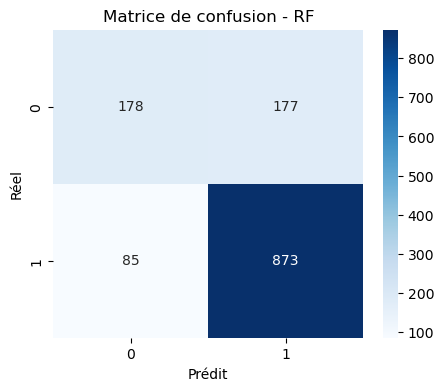

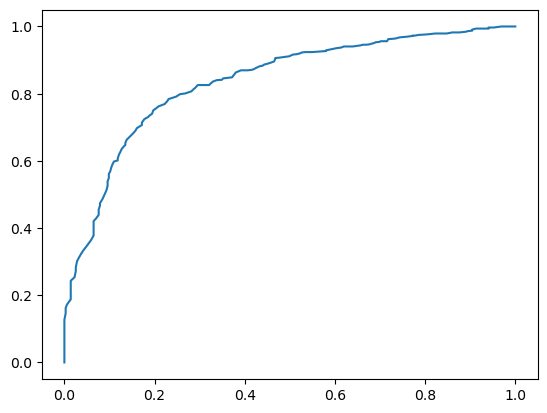

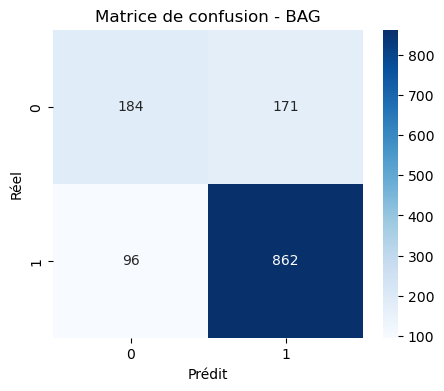

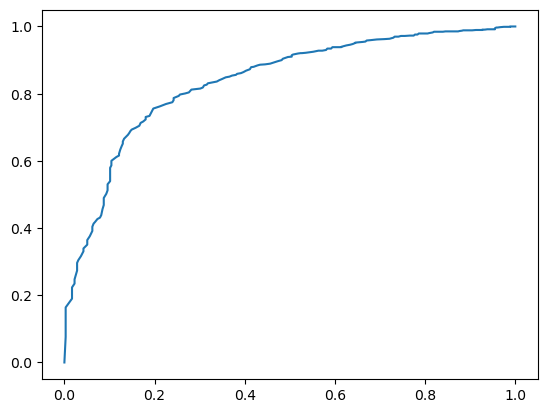

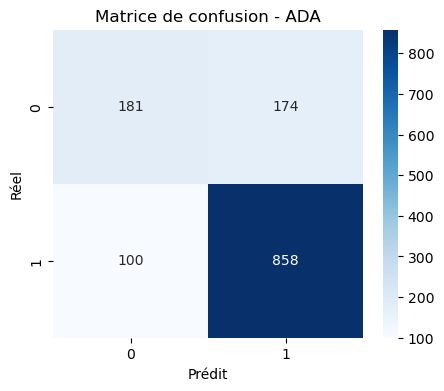

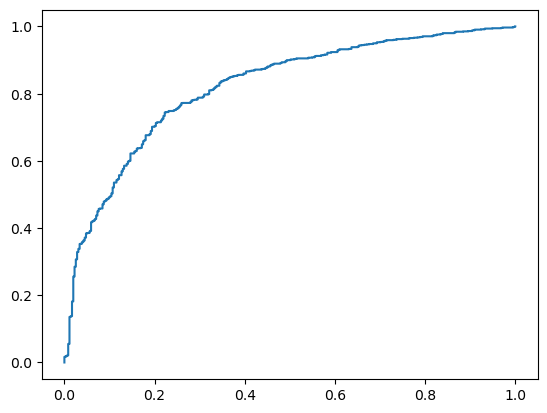

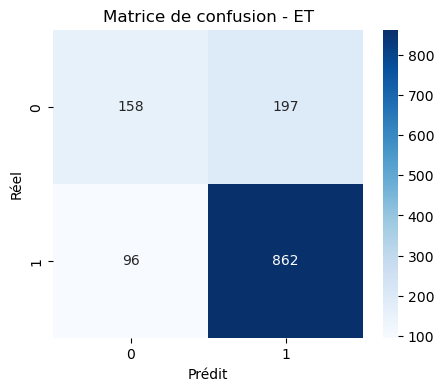

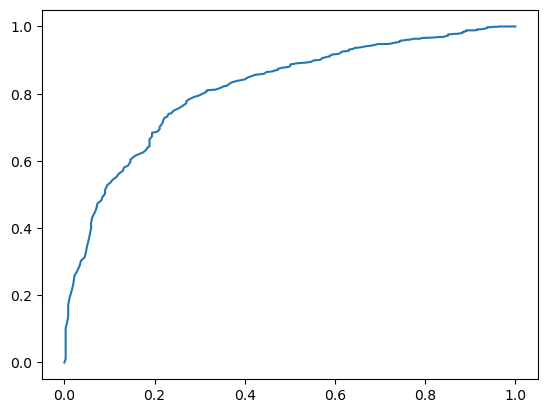

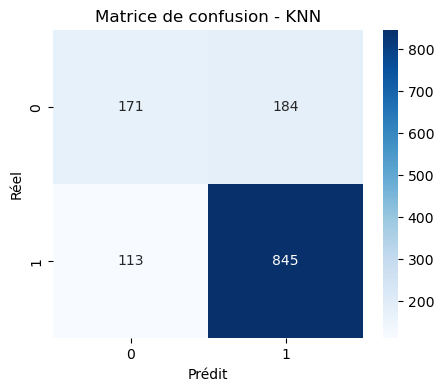

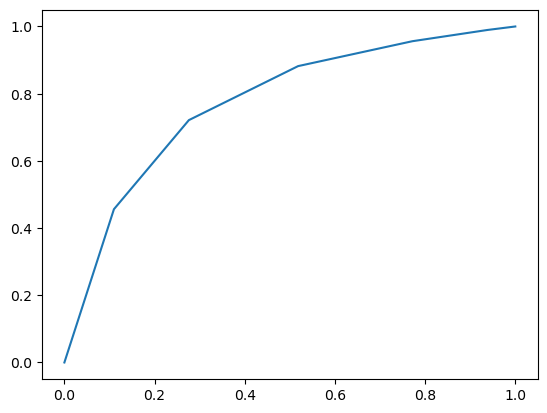

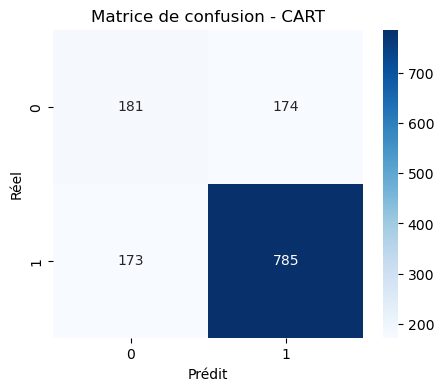

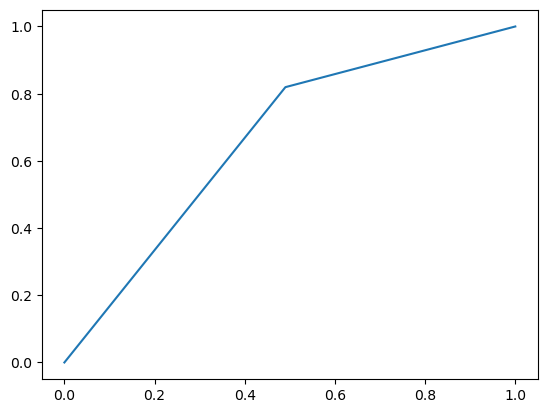

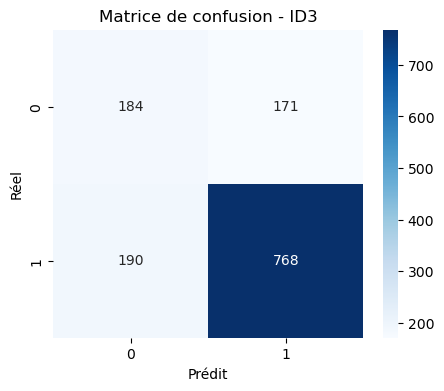

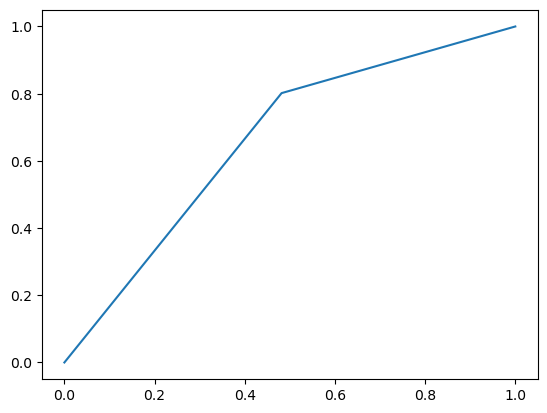

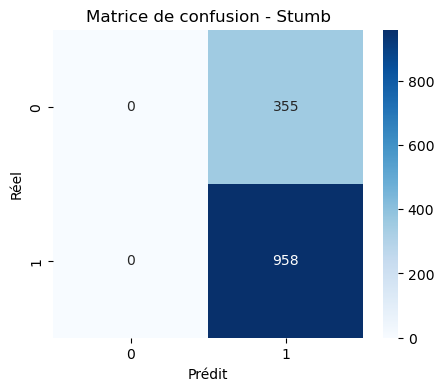

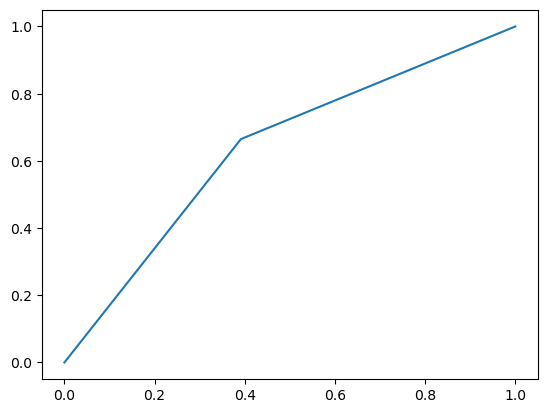

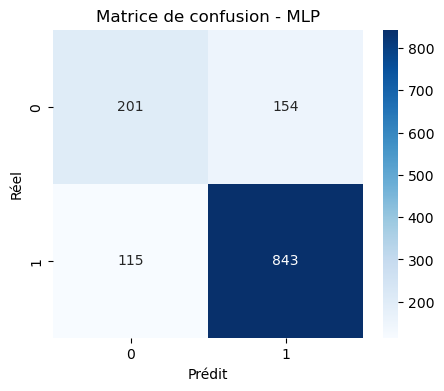

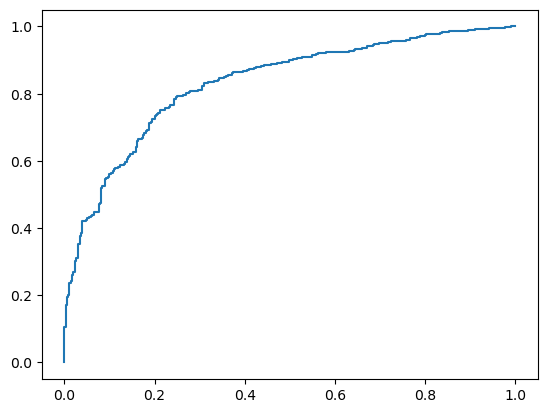

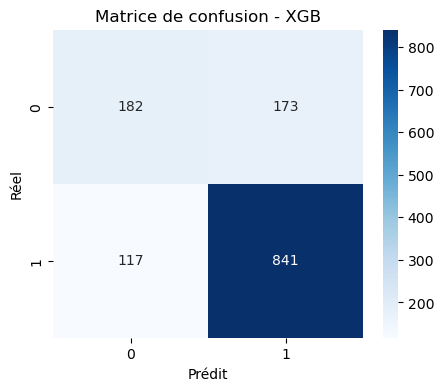

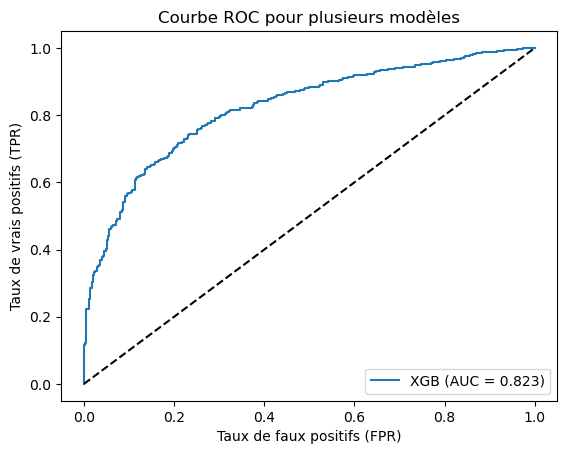

       Accuracy  Precision    Recall
NB     0.753237   0.855381  0.796451
RF     0.800457   0.831429  0.911273
BAG    0.796649   0.834463  0.899791
ADA    0.791318   0.831395  0.895616
ET     0.776847   0.813975  0.899791
KNN    0.773800   0.821186  0.882046
CART   0.735720   0.818561  0.819415
ID3    0.725057   0.817891  0.801670
Stumb  0.729627   0.729627  1.000000
MLP    0.795126   0.845537  0.879958
XGB    0.779132   0.829389  0.877871


In [35]:
# Initialisation des scores
results = {}

# Création des courbes ROC
plt.figure(figsize=(10, 7))

for name, model in clfs.items():
    # Entraînement du modèle
    model.fit(Xtrain_pca, Ytrain)
    
    # Prédictions sur le jeu de test
    Ypred = model.predict(Xtest_pca)
    
    if hasattr(model, "predict_proba"):
        Yprob = model.predict_proba(Xtest_pca)[:, 1] 
    else:
        Yprob = Ypred  

    # Calcul des métriques
    accuracy = accuracy_score(Ytest, Ypred)
    precision = precision_score(Ytest, Ypred, zero_division=0)
    recall = recall_score(Ytest, Ypred, zero_division=0)
    
    # Stockage des résultats
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

    # Matrice de confusion
    CM = confusion_matrix(Ytest, Ypred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(CM, annot=True, fmt='0.0f', cmap='Blues')
    plt.title(f'Matrice de confusion - {name}')
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.show()

    # Courbe ROC & AUC
    fpr, tpr, _ = roc_curve(Ytest, Yprob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Affichage de la courbe ROC globale
plt.plot([0, 1], [0, 1], 'k--')  # Diagonale (modèle aléatoire)
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC pour plusieurs modèles')
plt.legend(loc='lower right')
plt.show()



In [36]:
# Affichage des résultats sous forme de tableau
df_results = pd.DataFrame(results).T
print(df_results)

       Accuracy  Precision    Recall
NB     0.753237   0.855381  0.796451
RF     0.800457   0.831429  0.911273
BAG    0.796649   0.834463  0.899791
ADA    0.791318   0.831395  0.895616
ET     0.776847   0.813975  0.899791
KNN    0.773800   0.821186  0.882046
CART   0.735720   0.818561  0.819415
ID3    0.725057   0.817891  0.801670
Stumb  0.729627   0.729627  1.000000
MLP    0.795126   0.845537  0.879958
XGB    0.779132   0.829389  0.877871


Random Forest (RF) reste le meilleur modèle avec une accuracy de $80.05\%$, une precision de $83.14\%$ et un recall de $91.13\%$, offrant donc un bon équilibre.

Bagging (BAG) et AdaBoost (ADA), sont aussi proches de RF, avec un rappel élevé.

MLP et XGBoost (XGB) sont également performants, mais légèrement inférieurs à RF.

Modèles moins performants : Naïve Bayes (NB) et KNN.

Decision Stump a un recall de 100%, mais manque de précision donc à éviter.

On peut en conclure que Random Forest est le meilleur choix, suivi de près par Bagging et AdaBoost.

$\textbf{Mise en production du modèle Random Forest}$

In [38]:
import pickle
from sklearn.pipeline import Pipeline

In [39]:
# Séparation des données en jeu d'entraînement et jeu de test 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.5, random_state=1)

# Création du pipeline
pipeline = Pipeline([
    ('RandomForest', RandomForestClassifier(n_estimators=200, random_state=1))
])

# Entraînement du modèle
pipeline.fit(Xtrain, Ytrain)

# Prédictions sur les données de test
Ypred = pipeline.predict(Xtest)

# Calcul des métriques
accuracy = accuracy_score(Ytest, Ypred)
precision = precision_score(Ytest, Ypred)
recall = recall_score(Ytest, Ypred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

Ypred_loaded = loaded_model.predict(Xtest)

# Vérification des prédictions
accuracy_loaded = accuracy_score(Ytest, Ypred_loaded)
print(f'Précision du modèle chargé: {accuracy_loaded:.2f}')

Accuracy: 0.79
Precision: 0.83
Recall: 0.90
Précision du modèle chargé: 0.79


Le modèle Random Forest semble être assez performant sur les données de test avec une précision (accuracy) de $79\%$, et un rappel très élevé de $90\%$. Les résultats sont cohérents après la mise en production.